# Second Classifier

Classify the data without either price or duration features.

## Imports

In [1]:
from itertools import chain
import html
import ujson as json
import multiprocessing as mp
import pickle
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import StratifiedKFold

from helpers import all_scoring_metrics
from helpers import draw_rocs

%matplotlib inline
sns.set(context='talk')

num_folds = 10
eval_columns = ['f1',
                'accuracy',
                'true_negative_rate',
                'true_positive_rate',
                'roc_auc',
                'roc_fpr',
                'roc_tpr',
                'roc_thresholds']
price_cols = ['duration_in_mins',
              'price',
              'price_per_min']

In [2]:
df = pd.read_pickle('../../data/merged/data_to_use_by_phone_v4.pkl')
print(df.shape)
print(df['class'].value_counts())

(567, 343)
False    508
True      59
Name: class, dtype: int64


In [3]:
id_cols = {'class', 'phone'}
price_cols = {x for x in df.columns if x.find('price') > -1}
duration_cols = {x for x in df.columns if x.find('duration') > -1}
flag_cols = {x for x in df.columns if x.find('flag_') > -1}
ethnicity_cols = {x for x in df.columns if x.find('ethnicity_') > -1}

In [4]:
etc = ExtraTreesClassifier(oob_score=True,
                           bootstrap=True,
                           random_state=2,
                           n_estimators=100,
                           n_jobs=-1,
                           class_weight="balanced")

rf = RandomForestClassifier(oob_score=True,
                            random_state=2,
                            n_estimators=100,
                            n_jobs=-1,
                            class_weight="balanced")

## Execution!

In [5]:
y_series = df['class']
X_df = df.loc[:, sorted(set(df.columns) - id_cols - price_cols - duration_cols)]
print(y_series.shape)
print(X_df.shape)

(567,)
(567, 293)


### Extra Trees

In [6]:
etc_metrics = all_scoring_metrics(etc, X_df, y_series, StratifiedKFold(y_series, num_folds))

In [7]:
this_metrics = etc_metrics
print(this_metrics.roc_auc.mean())
this_metrics.loc[:, ['f1', 'accuracy', 'true_negative_rate', 'true_positive_rate', 'roc_auc']]

0.8944444444444445


,f1,accuracy,true_negative_rate,true_positive_rate,roc_auc
0,0.600000,0.929825,0.980392,0.500000,0.821895
1,0.363636,0.877193,0.941176,0.333333,0.776144
2,0.444444,0.912281,0.980392,0.333333,0.678105
3,0.400000,0.842105,0.882353,0.500000,0.933007
4,0.285714,0.824561,0.882353,0.333333,0.895425
5,0.500000,0.929825,1.000000,0.333333,0.964052
6,0.833333,0.964912,0.980392,0.833333,0.918301
7,0.666667,0.947368,1.000000,0.500000,0.957516
8,0.923077,0.982143,0.980000,1.000000,1.000000
9,1.000000,1.000000,1.000000,1.000000,1.000000


missing_similar_images_count:mean            0.029027
missing_similar_images_count:max             0.022399
missing_exp_ads_from_simimages_count:mean    0.022345
missing_similar_images_count:50%             0.021262
missing_exp_ads_from_simimages_count:max     0.020840
missing_similar_images_count:std             0.019953
missing_exp_ads_from_simimages_count:50%     0.018990
missing_exp_ads_from_simimages_count:std     0.018720
n_ads                                        0.018089
missing_exp_ads_from_simimages_count:75%     0.016291
n_distinct_locations                         0.015990
location_tree_length                         0.015860
flag_Juvenile                                0.015837
missing_age:std                              0.015367
missing_exp_ads_from_simimages_count:25%     0.014796
missing_similar_images_count:75%             0.014675
age:max                                      0.013913
images_count:min                             0.013910
age:min                     

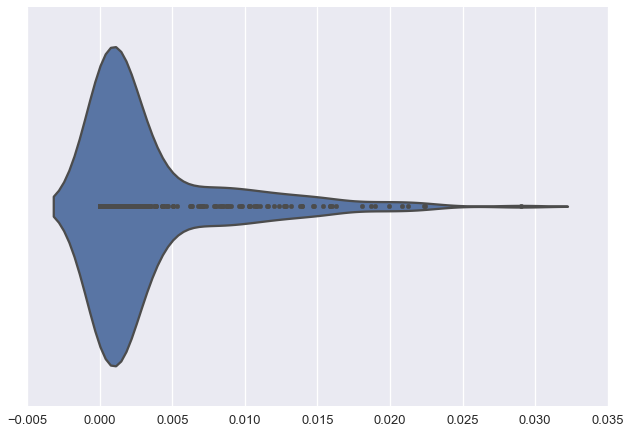

In [8]:
ranked_imptncs = this_metrics.loc[:,
                                  sorted(set(this_metrics.columns) - 
                                         set(eval_columns))].mean().sort_values(ascending=False)
print(ranked_imptncs.head(20))
sns.violinplot(ranked_imptncs, inner='point')

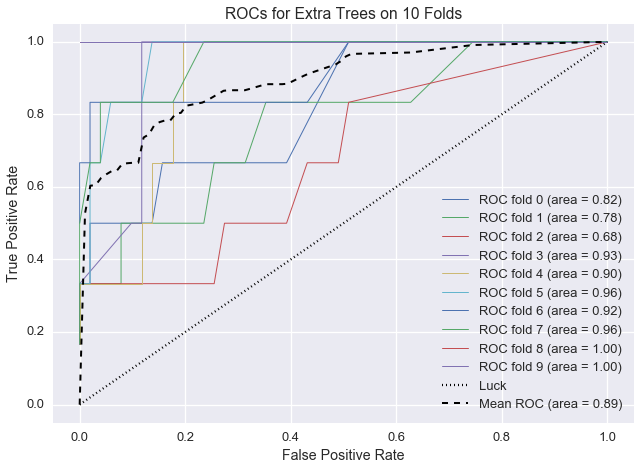

In [9]:
draw_rocs(this_metrics, 'Extra Trees')

### Random Forest

In [10]:
rf_metrics = all_scoring_metrics(rf, X_df, y_series, StratifiedKFold(y_series, num_folds))

In [11]:
this_metrics = rf_metrics
print(this_metrics.roc_auc.mean())
this_metrics.loc[:, ['f1', 'accuracy', 'true_negative_rate', 'true_positive_rate', 'roc_auc']]

0.893954248366013


,f1,accuracy,true_negative_rate,true_positive_rate,roc_auc
0,0.444444,0.912281,0.980392,0.333333,0.792484
1,0.363636,0.877193,0.941176,0.333333,0.848039
2,0.444444,0.912281,0.980392,0.333333,0.591503
3,0.400000,0.842105,0.882353,0.500000,0.933007
4,0.266667,0.807018,0.862745,0.333333,0.888889
5,0.500000,0.929825,1.000000,0.333333,0.946078
6,0.833333,0.964912,0.980392,0.833333,0.960784
7,0.666667,0.947368,1.000000,0.500000,0.978758
8,1.000000,1.000000,1.000000,1.000000,1.000000
9,1.000000,1.000000,1.000000,1.000000,1.000000


missing_exp_ads_from_simimages_count:mean    0.035826
age:min                                      0.026878
n_ads                                        0.025617
missing_similar_images_count:mean            0.025098
missing_similar_images_count:std             0.021634
missing_exp_ads_from_simimages_count:std     0.020945
similar_images_count:25%                     0.019412
age:mean                                     0.017359
age:max                                      0.017228
similar_images_count:75%                     0.016778
age:std                                      0.016210
images_count:25%                             0.014856
images_count:mean                            0.014739
similar_images_count:max                     0.014687
missing_age:mean                             0.014251
location_tree_length                         0.013860
age:nmlzd_count                              0.013534
similar_images_count:mean                    0.013525
exp_ads_from_simimages_count

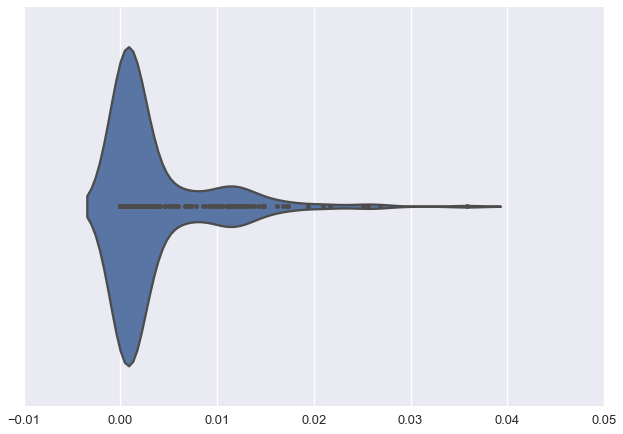

In [12]:
ranked_imptncs = this_metrics.loc[:,
                                  sorted(set(this_metrics.columns) - 
                                         set(eval_columns))].mean().sort_values(ascending=False)
print(ranked_imptncs.head(20))
sns.violinplot(ranked_imptncs, inner='point')

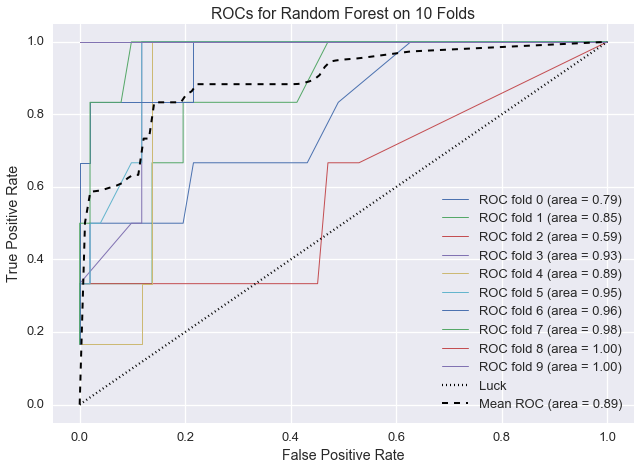

In [13]:
draw_rocs(this_metrics, 'Random Forest')